In [1]:
## Load packages (installation is needed)
import pandas as pd
import datetime
#from datetime import datetime

## Load scipy packet for fft signal analysis
import scipy as sp
import scipy.fftpack
from scipy import signal

## Load numpy for array and fft period analysis
import numpy as np
from numpy.fft import fft, ifft

import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from pyproj import Proj
#from scipy.fft import fft, fftfreq

#pd.set_option('display.max_rows', None)

In [119]:
## input data
## Set input data
## =================================================================================
data = pd.read_csv("data/D_SMALL.csv", sep=";")
## =================================================================================


##  Μαke data and panda dataframe
data["dates"]
data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
data['date'] = pd.to_datetime(data['ddate'].astype(str) +' '+ data['time'].astype(str))

## set date as index to dataframe
data = data.set_index(['date'])

## Plot dataframe to check data
data


,code,X,Y,Z,Hz,V,S,hsta,htarg,dates,h,min,sec,ddate,time
date,,,,,,,,,,,,,,,
2022-04-03 13:32:22.010,D1,112.5631,89.7040,16.4762,143.7066,81.6279,16.9439,1.654,0,3/4/2022,13,32,22.01,2022-04-03,13:32:22.01
2022-04-03 13:32:22.600,D2,112.5617,89.7052,16.4756,143.7066,81.6281,16.9419,1.654,0,3/4/2022,13,32,22.60,2022-04-03,13:32:22.6
2022-04-03 13:32:23.170,D3,112.5625,89.7046,16.4757,143.7066,81.6288,16.9429,1.654,0,3/4/2022,13,32,23.17,2022-04-03,13:32:23.17
2022-04-03 13:32:23.740,D4,112.5617,89.7052,16.4755,143.7065,81.6285,16.9419,1.654,0,3/4/2022,13,32,23.74,2022-04-03,13:32:23.74
2022-04-03 13:32:24.940,D5,112.5618,89.7052,16.4754,143.7064,81.6289,16.9419,1.654,0,3/4/2022,13,32,24.94,2022-04-03,13:32:24.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03 13:49:54.550,D1802,112.5610,89.7043,16.4756,143.7111,81.6281,16.9419,1.654,0,3/4/2022,13,49,54.55,2022-04-03,13:49:54.55
2022-04-03 13:49:55.110,D1803,112.5610,89.7043,16.4756,143.7109,81.6283,16.9419,1.654,0,3/4/2022,13,49,55.11,2022-04-03,13:49:55.11
2022-04-03 13:49:55.690,D1804,112.5610,89.7043,16.4756,143.7110,81.6281,16.9419,1.654,0,3/4/2022,13,49,55.69,2022-04-03,13:49:55.69


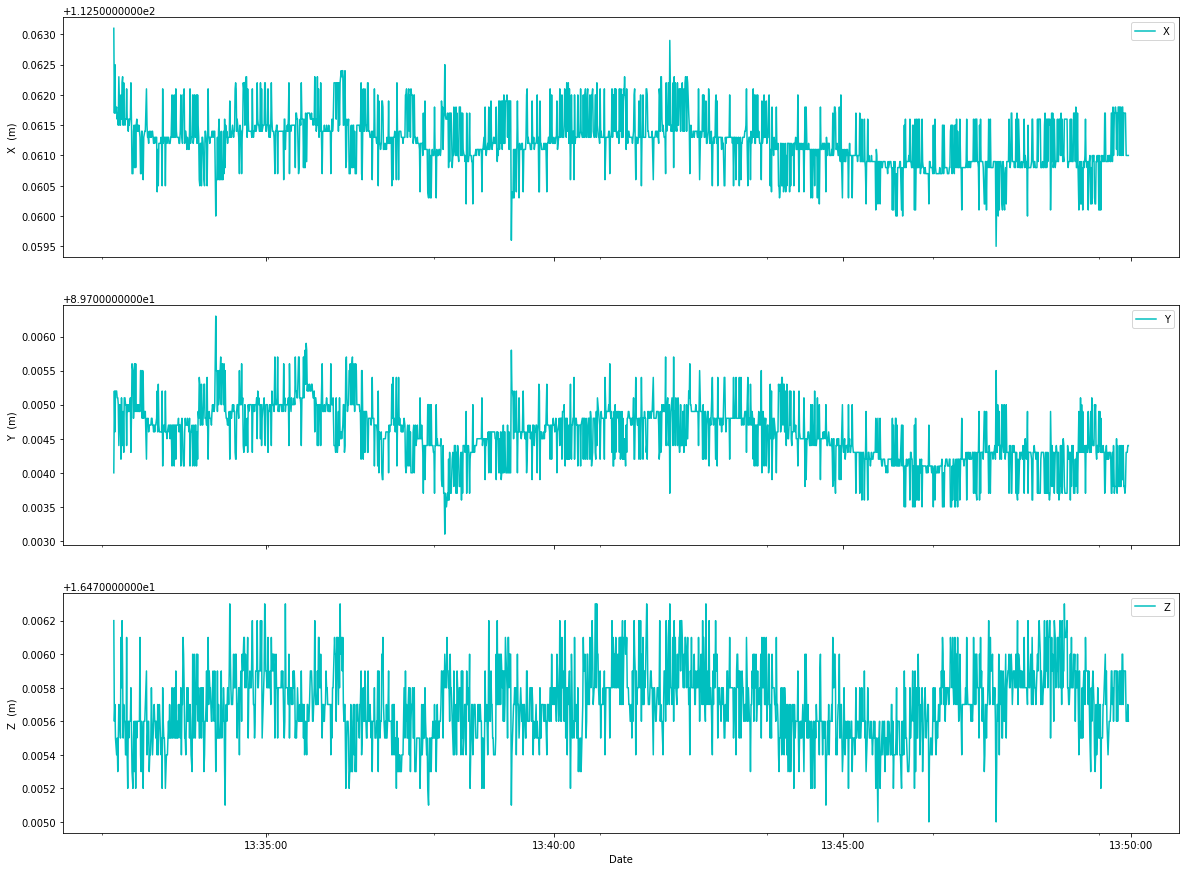

In [120]:
## make time series for the three axes
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)

plot_cols = ['X', 'Y', 'Z' ]

data[plot_cols].plot(subplots=True, ax=axes, marker=' ', color='c')

month_day_formatter = mdates.DateFormatter("%H:%M:%S")

for ax, col in zip(axes, plot_cols):
    # add axis labels
    ax.set_ylabel(col + '  (m)')
    ax.set_xlabel('Date')
    ax.xaxis.set_major_formatter(month_day_formatter)

## Save the figure
## =================================================================================
fig.savefig("Outputs/ts/timeseries_T4.png")
## =================================================================================

In [121]:
## set the column for FFT PSD analysis
## =================================================================================
temp = data['Z']
## =================================================================================

## Count thw aarray length
N = len(temp)

## Plot temporary array
#temp


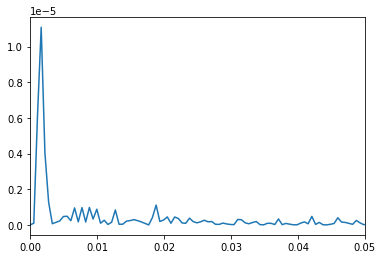

In [122]:
# Estimate power spectral density using a periodogram
f, Pxx = signal.periodogram(temp)

# lets plot this periodogram
plt.plot(f, Pxx)
plt.xlim(0, 0.05)

## Save priodogram
## =================================================================================
plt.savefig("Outputs/periodogram/periodograms_T4_Z.png")
## =================================================================================

In [123]:
## Take three powerfull period for the analysis
top_3_periods = {}

# get indices for 3 highest Pxx values
top3_freq_indices = np.flip(np.argsort(Pxx), 0)[0:3]

# use indices from previous step to
# get 3 frequencies with highest power
freqs = f[top3_freq_indices]

# use same indices to get powers as well
power = Pxx[top3_freq_indices]

# we are interested in period and it is calculated as 1/frequency 
periods = 1 / np.array(freqs)

# populate dict with calculated values
top_3_periods['period1'] = periods[0]
top_3_periods['freq1'] = freqs[0]
top_3_periods['power1'] = power[0]

top_3_periods['period2'] = periods[1]
top_3_periods['freq2'] = freqs[1]
top_3_periods['power2'] = power[1]

top_3_periods['period3'] = periods[2]
top_3_periods['freq3'] = freqs[2]
top_3_periods['power3'] = power[2]

## Resulte for three first frequencies
top_3_periods

{'period1': 602.0,
 'freq1': 0.0016611295681063123,
 'power1': 1.1087693799936704e-05,
 'period2': 903.0,
 'freq2': 0.0011074197120708748,
 'power2': 6.1181809343839615e-06,
 'period3': 451.5,
 'freq3': 0.0022148394241417496,
 'power3': 4.052263107651075e-06}

In [136]:
## estimate fft and psd arrays
tempa=np.array(temp)
temp_fft = sp.fftpack.fft(tempa)
temp_psd = np.abs(temp_fft) ** 2

## Set period 
## =================================================================================
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 451.5 )
## =================================================================================


## take only positive frequencies
i = fftfreq > 0

## Print frequencies
#print(fftfreq)


In [137]:
x = list(range(len(data.index)))
y = data['Z']
# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(temp))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
#plt.semilogy(freq,nspectrum)


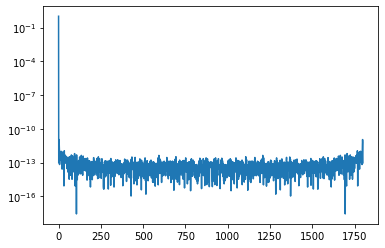

In [138]:
# improve the plot by convertint the data into grouped per week to avoid peaks
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/1800)
plt.semilogy(results['period'], results['nspectrum'])

## Save spectrum analysis

plt.savefig("Outputs/spectrume/spectrum_T4_Z_period3.png")

In [139]:
#results['period_round'] = results['period'].round()
#grouped_week = results.groupby('period_round')['nspectrum'].sum()
#plt.semilogy(grouped_week.index, grouped_week)
#plt.xticks([1, 500, 1000, 1500, 1800])

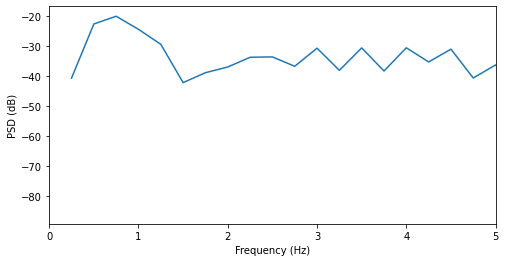

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (dB)')
## =================================================================================
fig.savefig("Outputs/fftfreq_ts/fftfreq_T4_Period3.png")
## =================================================================================


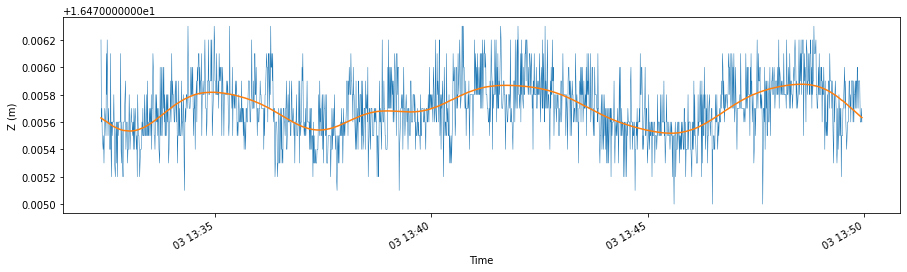

In [141]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 2 ] = 0

date= pd.to_datetime(data.index)
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
#ax.set_xlim(datetime.date(1994, 1, 1),
#            datetime.date(2000, 1, 1))
#ax.set_ylim(18.838, 18.841)
ax.set_xlabel('Time')
## Set Y Axis, the column for fft analysis
## =================================================================================
ax.set_ylabel('Z (m)')
## =================================================================================

## Save time-series with fft frequencies
## =================================================================================
fig.savefig("Outputs/fftfreq_ts/ts_fftfeq_T4_Period3.png")
## =================================================================================
